Explained variance ratio by each component: [0.08272752 0.05391809 0.0384874  0.0366802  0.03278707 0.03195222
 0.0310155  0.03053694 0.02971812 0.02901205 0.02840443 0.02833623
 0.02827898 0.02798138 0.02782518 0.02780015 0.02778944 0.02777365
 0.02771841 0.0276275  0.02748001 0.02717821 0.02702734 0.02677373
 0.02561305 0.02542737 0.02391683 0.02274355 0.02145486 0.02039442
 0.01824409 0.01651153 0.01624279 0.01170931 0.00900752 0.00390488
 0.        ]
Total explained variance: 0.9999999999999997


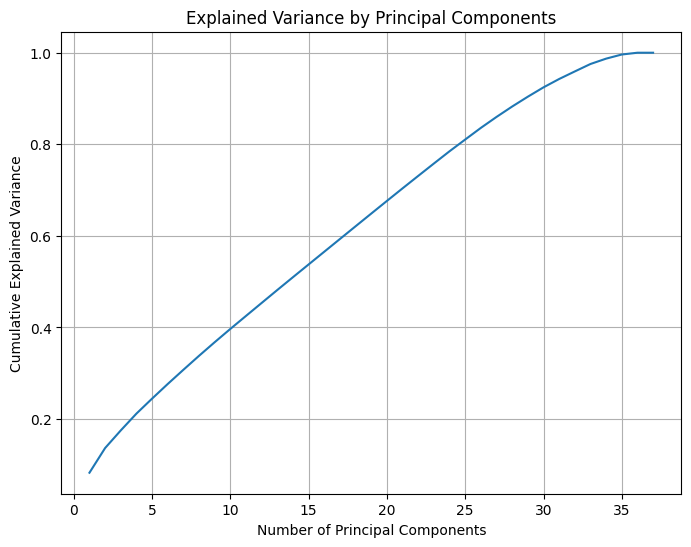

New dataset shape after PCA: (71518, 29)
Model Performance after PCA:
Accuracy: 0.9184843400447428
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13140
           1       0.25      0.00      0.00      1164

    accuracy                           0.92     14304
   macro avg       0.58      0.50      0.48     14304
weighted avg       0.86      0.92      0.88     14304

Model Performance without PCA:
Accuracy: 0.9184843400447428
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13140
           1       0.25      0.00      0.00      1164

    accuracy                           0.92     14304
   macro avg       0.58      0.50      0.48     14304
weighted avg       0.86      0.92      0.88     14304



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('cleansed_data.csv')

# For demonstration, let's assume `df` is the dataframe and `X` is the feature matrix
# Example: X = df.drop('target', axis=1) for classification task
X = df.drop('readmitted', axis=1)  # Replace 'target' with the actual target column
y = df['readmitted']  # Replace with the target column name

# Step 1: Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()  # By default, PCA will keep all components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Check the explained variance ratio
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Step 4: Choose the number of components that explain enough variance (e.g., 90%)
# Let's say we choose enough components to explain 90% of the variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

print(f"New dataset shape after PCA: {X_pca.shape}")

# Step 5: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train a classifier (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model performance with PCA
y_pred = model.predict(X_test)
print("Model Performance after PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Step 8: Train the same classifier without PCA for comparison
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred_no_pca = model.predict(X_test)

# Step 9: Evaluate the model performance without PCA
print("Model Performance without PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_pca)}")
print(classification_report(y_test, y_pred_no_pca))


Sice accuracy and other performance measure does not change much even after applying PCA so, we wont apply PCA for our dataset